# MC886/MO444 - Projeto Final: Primeiro Resultado

- André Vila Nova Wagner da Costa - RA: 213081
- Breno Nunes Tavares - RA: 232238
- Eduardo Carvalheira Teixeira de Aguiar - RA: 233686
- Matheus Xavier Sampaio - RA: 220092

In [ ]:
!pip install -U scikit-learn matplotlib numpy pandas

## Dados

### Download

In [ ]:
# !wget -O FakeWhatsApp.Br.zip https://codeload.github.com/cabrau/FakeWhatsApp.Br/zip/refs/heads/master
# !unzip FakeWhatsApp.Br.zip

### Carregando dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_2018 = pd.read_csv('FakeWhatsApp.Br-master/data/2018/fakeWhatsApp.BR_2018_content_only.csv')
df_2020 = pd.read_csv('FakeWhatsApp.Br-master/data/wpp_2020.csv')

In [ ]:
df_2018.head()

,id,date,hour,shares,text,misinformation
0,6942577183305588053,02/07/18,10:46,1,"O dia em que ex-guerrilheiro, militantes e des...",1
1,-2072140886659020977,02/07/18,10:50,3,O nível dos jornalistas do programa Roda Viva ...,1
2,-5100443702615645928,02/07/18,11:03,2,*Atenção*\n\nPrecisamos da ajuda de todos você...,0
3,-1561843698204261697,02/07/18,16:32,5,"Gestão do colombiano na capital, imagina ele n...",1
4,-5876784761398352499,02/07/18,18:09,2,🛑🛑🛑🛑🛑🛑\nInterrompendo momentaneamente a conver...,1


In [ ]:
df_2020.head()

,shares,text,misinformation,source,revision
0,27,"O ministro da Ciência, Tecnologia, Inovações e...",0,https://www.gov.br/pt-br/noticias/educacao-e-p...,NaN
1,26,Pesquisa com mais de 6.000 médicos em 30 paíse...,1,https://www.aosfatos.org/noticias/e-falso-que-...,NaN
2,25,É com muita alegria que comunico que mais um p...,0,http://portal.mec.gov.br/component/content/art...,NaN
3,25,Renda Brasil unificará vários programas sociai...,0,https://agenciabrasil.ebc.com.br/politica/noti...,NaN
4,24,O Secretário-Geral da OTAN Jens Stoltenberg ta...,0,NaN,1.0


In [ ]:
df_2018['year'] = 2018
df_2020['year'] = 2020
cols = ['shares', 'year', 'text', 'misinformation']

In [ ]:
df_all = df_2018.append(df_2020)
df_all.drop(columns=[*filter(lambda x: x not in cols, df_all.columns)], inplace=True)
df_all.reset_index(drop=True, inplace=True)
df_all = df_all[cols]

In [ ]:
df_all.head()

,shares,year,text,misinformation
0,1,2018,"O dia em que ex-guerrilheiro, militantes e des...",1
1,3,2018,O nível dos jornalistas do programa Roda Viva ...,1
2,2,2018,*Atenção*\n\nPrecisamos da ajuda de todos você...,0
3,5,2018,"Gestão do colombiano na capital, imagina ele n...",1
4,2,2018,🛑🛑🛑🛑🛑🛑\nInterrompendo momentaneamente a conver...,1


### Analise inicial

In [ ]:
def print_size_and_counts(df):
    print(len(df))
    print(df['misinformation'].value_counts())

In [ ]:
print_size_and_counts(df_all)

9824
0    5610
1    4214
Name: misinformation, dtype: int64


## Pre-processamento

### Texto em caixa baixa

In [ ]:
df_all['text'] = df_all['text'].str.lower()

In [ ]:
df_all.head()

,shares,year,text,misinformation
0,1,2018,"o dia em que ex-guerrilheiro, militantes e des...",1
1,3,2018,o nível dos jornalistas do programa roda viva ...,1
2,2,2018,*atenção*\n\nprecisamos da ajuda de todos você...,0
3,5,2018,"gestão do colombiano na capital, imagina ele n...",1
4,2,2018,🛑🛑🛑🛑🛑🛑\ninterrompendo momentaneamente a conver...,1


### Separando treino, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['misinformation'])
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42,  stratify=df_train['misinformation'])

df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [ ]:
print_size_and_counts(df_train)

6287
0    3590
1    2697
Name: misinformation, dtype: int64


In [ ]:
print_size_and_counts(df_val)

1572
0    898
1    674
Name: misinformation, dtype: int64


In [ ]:
print_size_and_counts(df_test)

1965
0    1122
1     843
Name: misinformation, dtype: int64


## Preparando dados para algoritmo

### Utilizando `CountVectorizer` para contar e codificar as palavras e textos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=5)

In [ ]:
X_train = vectorizer.fit_transform(df_train['text'].values)
X_train = X_train.toarray()
X_val = vectorizer.transform(df_val['text'].values)
X_val = X_val.toarray()

y_train = df_train['misinformation'].values
y_val = df_val['misinformation'].values

### Exibindo alguns exemplos de palavras e textos

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train.shape

(6287, 11419)

In [ ]:
palavras = vectorizer.get_feature_names_out()
palavras.shape

(11419,)

In [ ]:
np.random.seed(0)
np.random.choice(palavras, 50)

array(['comprova', 'uc3uaveaivmcexbrgel7vvmw', 'saíram', 'curitiba',
       'extremamente', 'realmente', 'organizacao', 'envio', 'igor',
       'liminar', 'dem', 'acorda', 'coluna', 'talheres', 'carreira',
       'octacampeão', 'considerada', 'sei', '91', 'vicentinho',
       'interessante', 'majoritariamente', 'indevida', 'cap11', 'festa',
       'extingue', 'orava', 'cabra', 'bloqueio', 'neste', 'classificadas',
       'perguntamos', 'subjugar', 'aderir', 'adotadas', 'acertando',
       'ctmfb64lpsy', 'pq', 'municipal', 'dantas', 'comunicado',
       'ewentos', 'pretendem', 'levem', 'acordou', 'cebulski', 'período',
       'vaga', 'violarem', 'aparecida'], dtype=object)

In [ ]:
palavras[X_train[0] > 0]

array(['050', '10', '17', '17000', 'adesivaço', 'anne', 'as', 'ato',
       'belinelle', 'bloco', 'bolsonaro', 'buzina', 'colocar', 'de',
       'dia', 'dos', 'eu', 'faixa', 'flávio', 'girassóis', 'hoje',
       'horas', 'josimar', 'lucas', 'marcos', 'mobilização', 'na',
       'nacional', 'praça', 'prol', 'rodolfo', 'rua', 'taquaralto', 'to',
       'vou'], dtype=object)

In [ ]:
print(df_train.loc[0, 'text'])

hoje dia *17 as 17horas*

*o dia nacional de mobilização prol bolsonaro*

bloco na rua

ato: colocar a faixa buzina na passarela de taquaralto na to 050

eu vou!

1. marcos
2. lucas belinelle 17000
3. rodolfo 
4.anne 
5.wilhamis
6.
7.
8.
9.
10.

adesivaço na praça dos girassóis dia 17 as 17 horas

eu vou.

1. josimar
2. flávio 
3.
4.
5.
6.
7.
8.
9.
10.


In [ ]:
w = 'uc3uaveaivmcexbrgel7vvmw'
texts = [*filter(lambda x: w in x, df_train['text'])]
print(*texts, sep=f'\n\n{"=" * 200}\n\n')

https://youtu.be/vg0ibqex238

confira o vídeo 👆 referência dos apoiadores de bolsonaro no tocantins

estadual: professor edison 1⃣7⃣7⃣0⃣0⃣

realizamos no dia 21/09/2018 a útltima reunião dos bolsonaristas antes da eleição do dia 07/10. 

resoluções do grupo:

1. postar os candidatos que passaram pelo crivo do grupo: farlei senador, patrícia federal, edisom estadual e lucas estadual.

2. trabalhar os grupos de cada cidade em especial das 22 maiores. e observar e pedir ajuda as lideranças que podem criar novos grupos em todas as cidades do tocantins.

3. enviar os links desses grupos para que as pessoas possam migrar para os grupos das cidades onde o trabalho será intensificado com foco.

4. o foco estratégico é compartilhar a página de referência no tocantins: direita palmas e amor pelo brasil. somos 50 bolsonaristas em palmas se todos compartilherem chegaremos aos potenciais eleitores.

5. foco nas postagem no whastapp evitar envios redundantes sem foco eleitoral. queremos ganhar quere

## Treinando e avaliando algoritmo

### Classificador probabilístico Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

### Avaliando resultados de treino e validação

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

In [ ]:
clf.score(X_train, y_train)

0.8369651662160013

In [ ]:
y_pred_val = clf.predict(X_val)

In [ ]:
print(f'Accuracy: {accuracy_score(y_val, y_pred_val)}')

Accuracy: 0.7538167938931297


In [ ]:
print(classification_report(
    y_val, y_pred_val, target_names=['not misinformation', 'misinformation']
))

                    precision    recall  f1-score   support

not misinformation       0.74      0.88      0.80       898
    misinformation       0.78      0.59      0.67       674

          accuracy                           0.75      1572
         macro avg       0.76      0.73      0.74      1572
      weighted avg       0.76      0.75      0.75      1572



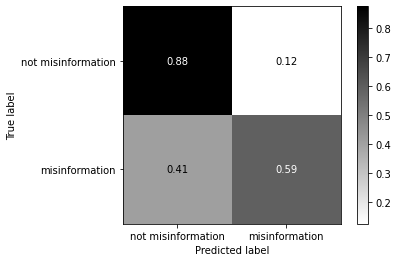

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_val, y_pred_val, 
    display_labels=['not misinformation', 'misinformation'], 
    normalize='true',
    cmap=plt.cm.binary
);